In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [72]:
cols = [i for i in range(11)]
print(cols)
df =pd.read_csv("magic04.data", names=cols)
df.head()
df[10]= (df[10]=="g").astype(int) # convert gamma to 1 and other 0 from string to number for model to understand
df.head() #prints only first 5

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


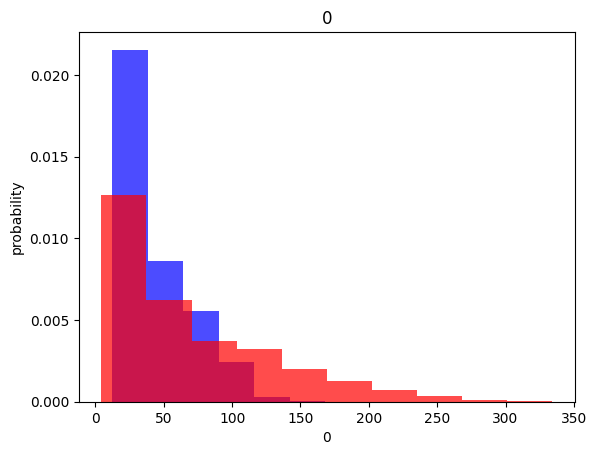

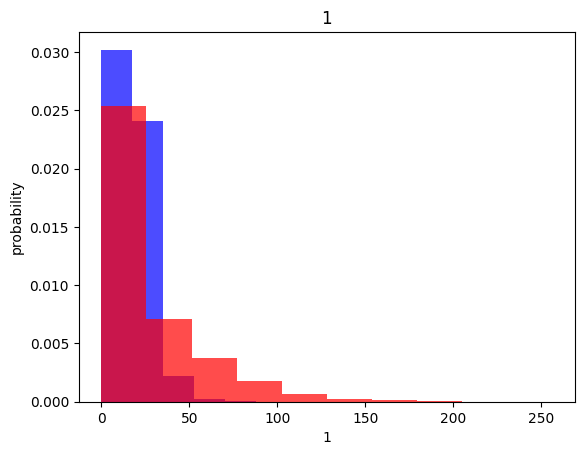

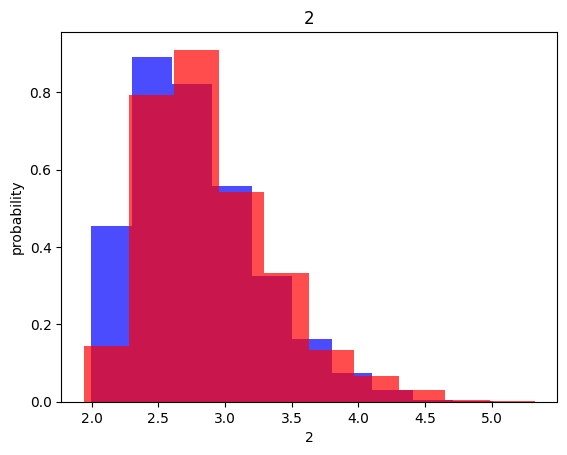

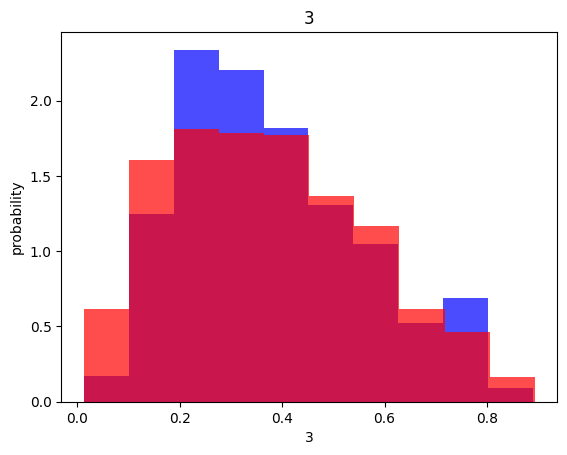

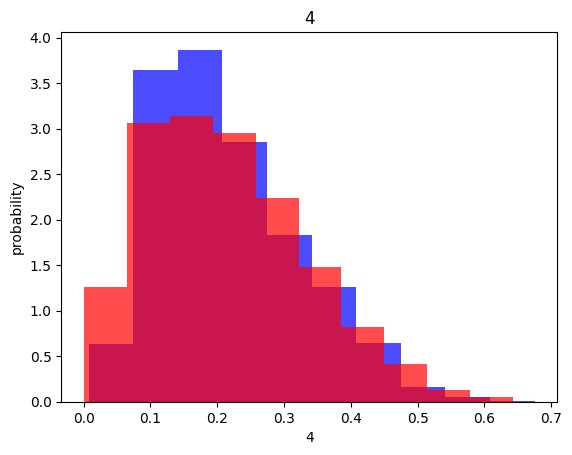

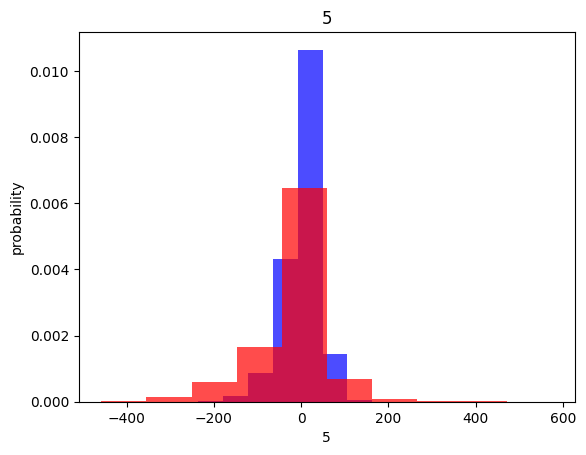

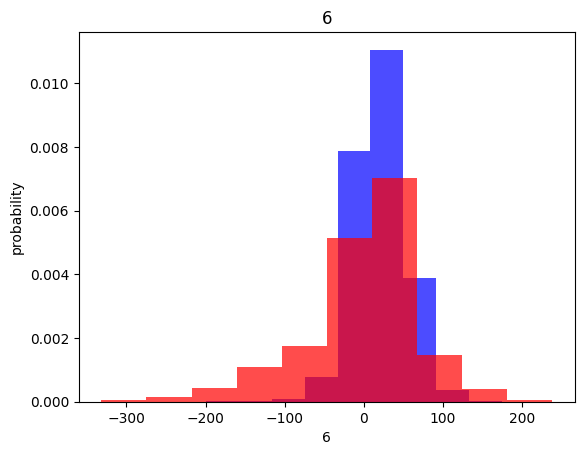

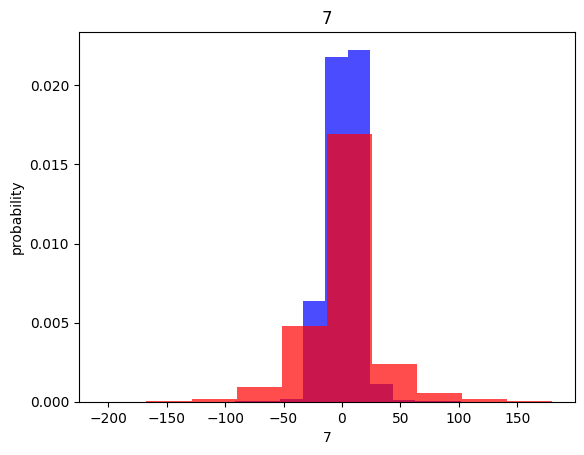

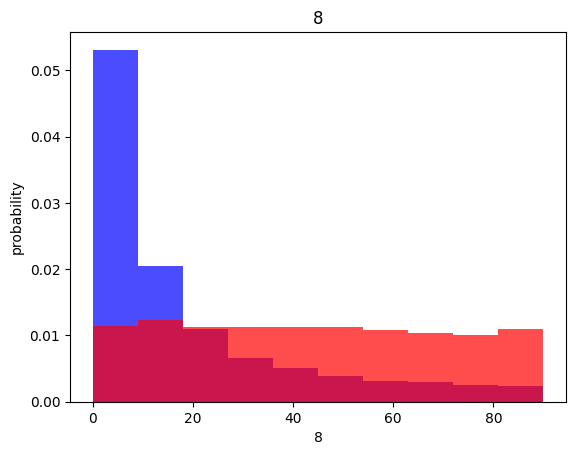

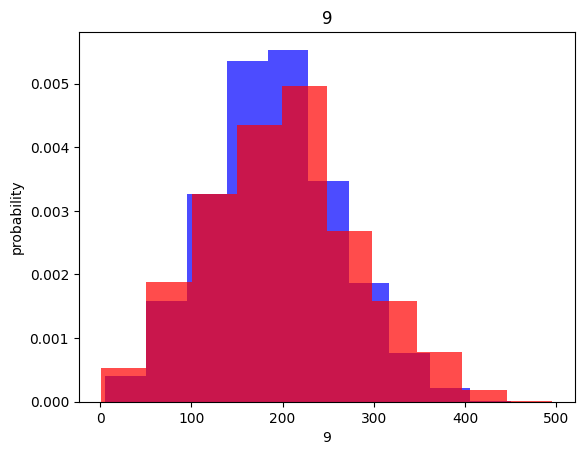

In [73]:
for label in cols[:-1]:
  plt.hist(df[df[10]==1][label], color='blue',label='gamma',alpha=0.7, density=True ) #density=True will normalise the data
  plt.hist(df[df[10]==0][label], color='red',label='hadron',alpha=0.7, density=True )
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.show()


In [74]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))]) #split data into training/validation and tetsing data

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [75]:
def scale(dataf, over_sampling=False): #see other document for explaination
  x = dataf[dataf.columns[:-1]].values
  y = dataf[dataf.columns[-1]].values

  scalar = StandardScaler()
  x = scalar.fit_transform(x)
  print(x)
  if over_sampling:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x, np.reshape(y, (-1,1))))
  return data,x,y

In [76]:
print(len(train[train[10]==1]))
print(len(train[train[10]==0]))

7385
4027


In [77]:
train , x_train, y_train = scale(train, True)
print(len(train))
print(len(x_train))
print(len(y_train))
print(sum(y_train==1))
print(sum(y_train==0))
valid , x_valid, y_valid = scale(valid, False)

test , x_test, y_test = scale(test, False)


[[-8.54198539e-01 -8.07620584e-01 -1.26701112e+00 ... -2.33830513e-01
  -7.77845440e-02 -6.47818561e-01]
 [-7.99321947e-01 -3.29173572e-01 -5.51597631e-01 ...  5.31842777e-01
   1.27099654e+00 -8.87617127e-01]
 [-7.58157428e-01 -3.91376903e-01 -4.75373652e-01 ... -4.85252687e-01
  -8.79231849e-01 -4.52213448e-01]
 ...
 [ 1.01470695e+00 -1.62265107e-01  2.87963584e-05 ...  6.64425935e-01
  -6.72664455e-01 -5.01184639e-02]
 [-2.78418849e-01 -3.36980248e-01 -4.53276210e-02 ... -8.34332638e-01
   1.95024012e+00  2.62338200e-01]
 [-8.76993032e-01 -7.83651481e-01 -1.23215387e+00 ... -8.80923862e-02
   2.02558446e+00  5.56393612e-01]]
14770
14770
14770
7385
7385
[[-0.9325962  -0.57743325 -1.43978593 ...  0.28924524  2.05287942
  -0.54799551]
 [-0.77727834 -0.75133329 -0.73487315 ...  0.18369911 -0.05307079
   0.48931818]
 [-0.79019759 -0.77707915 -1.48048281 ...  0.15865816  0.61770773
  -0.1458766 ]
 ...
 [ 1.22704103 -0.64813752  0.07370957 ... -0.55015871 -1.03019617
   1.55779266]
 [-0.77

In [57]:
train

array([[-0.57722602, -0.33680419, -0.38113037, ...,  0.47681587,
        -1.49786555,  1.        ],
       [-0.51096889, -0.57002666, -0.64859479, ..., -0.81541816,
         0.15312459,  1.        ],
       [ 2.56827756,  6.20585836,  2.61578306, ...,  1.88922413,
         0.84263513,  1.        ],
       ...,
       [-0.76802126, -0.53575681, -0.18307127, ...,  1.380584  ,
         0.2901114 ,  0.        ],
       [-0.97646366, -0.78286818, -1.07137478, ...,  2.06766384,
         0.3572332 ,  0.        ],
       [ 0.33453009,  0.05312092,  0.10534171, ..., -0.25530106,
         0.8665747 ,  0.        ]])

In [ ]:
s = set()
s.add((1,2))
print(s)

{(1, 2)}


In [ ]:
import heapq
h = []
heapq.heappush(h,3)

heapq.heappush(h,1)
heapq.heappush(h,2)
heapq.heappush(h,3)
print(h)
print(heapq.heapify(h))
print(h)
print(heapq.heappop(h))
print(h)

[1, 3, 2, 3]
None
[1, 3, 2, 3]
1
[2, 3, 3]


In [ ]:
import heapq

maxheap = []
heapq.heappush(maxheap, -3)
heapq.heappush(maxheap, -2)
heapq.heappush(maxheap, -1)
print(-1* maxheap[0])
while len(maxheap):
  print(-1* heapq.heappop(maxheap))

3
3
2
1


In [ ]:
arr=[3,2,5,2,1,5]
heapq.heapify(arr)
while arr:
  print(heapq.heappop(arr))

1
2
2
3
5
5


In [ ]:
def func(b):
  a=15
  print(a,b)

  def inner():
    nonlocal a
    a=3
    c=9
    print(a+b+c)
  print(inner())
  print(a)


func(1)


15 1
13
None
3


In [ ]:
class MyClass:
  def __init__(self, nums):
    self.nums - nums
    self.size - len(nums)

  def getL(self):
    return self.size



-1


In [ ]:
print(10%3)

1


In [ ]:
print(-10&3)

2


In [ ]:
import math
print(math.floor(5/2))

2


In [ ]:
print(math.ceil(5/2))

3


In [ ]:
print(math.sqrt(4))

2.0


In [ ]:
print(math.pow(2,3))

8.0


In [ ]:
float("inf")

inf

In [ ]:
float("-inf")

-inf

In [ ]:
arr=[1,2,3]

In [ ]:
print(arr)

[1, 2, 3]


In [ ]:
arr.append(5)
print(arr)

[1, 2, 3, 5]


In [ ]:
arr.pop()

5

In [ ]:
arr.insert(0,5)

In [ ]:
print(arr)

[5, 1, 2, 3]


In [ ]:
print(arr[0])

5


In [ ]:
arr[0]=2
print(arr)

[2, 1, 2, 3]


In [ ]:
arr = [0]*7
print(arr)

[0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(arr[-1])

0


In [ ]:
print(arr[-2])

0


In [ ]:
arr[1:3]

[0, 0]

In [ ]:
print(arr[1:3])

[0, 0]


In [ ]:
arr1 = [1,2,5,3]
arr2 = [2,4,5]

# arr1.reverse()
# print(arr1)
# arr1.sort()
# print(arr1)
# arr1.reverse()
# print(arr1)
arr1.sort(reverse=True)
print(arr1)

[5, 3, 2, 1]


In [ ]:
for i in range(len(arr)):
  print(arr[i])

for i,n in enumerate(arr):
  print(i,n)

0
0
0
0
0
0
0
0 0
1 0
2 0
3 0
4 0
5 0
6 0
